## Observations and Insights

## Dependencies and starter code

In [66]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
dataset = pd.merge(study_results, mouse_metadata,on="Mouse ID",how="left")
dataset.head(5)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


## Summary statistics

In [67]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
datasetGroup=dataset
dGroup=round(datasetGroup.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean(),2)
dG = pd.DataFrame(dGroup)
dG = dG.rename(columns={"Tumor Volume (mm3)":"Mean"})
dGroup=round(datasetGroup.groupby("Drug Regimen")["Tumor Volume (mm3)"].median(),2)
dG["Median"] = pd.DataFrame(dGroup)
dGroup=round(datasetGroup.groupby("Drug Regimen")["Tumor Volume (mm3)"].var(),2)
dG["Variance"] = pd.DataFrame(dGroup)
dGroup=round(datasetGroup.groupby("Drug Regimen")["Tumor Volume (mm3)"].std(),2)
dG["Std deviation"] = pd.DataFrame(dGroup)
dGroup=round(datasetGroup.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem(),2)
dG["SEM"] = pd.DataFrame(dGroup)
dGroup=datasetGroup.groupby("Drug Regimen")["Tumor Volume (mm3)"].count()
dG["Time Points"] = pd.DataFrame(dGroup)
dG

,Mean,Median,Variance,Std deviation,SEM,Time Points
Drug Regimen,,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33,230
Ceftamin,52.59,51.78,39.29,6.27,0.47,178
Infubinol,52.88,51.82,43.13,6.57,0.49,178
Ketapril,55.24,53.70,68.55,8.28,0.60,188
Naftisol,54.33,52.51,66.17,8.13,0.60,186
Placebo,54.03,52.29,61.17,7.82,0.58,181
Propriva,52.32,50.85,42.35,6.51,0.51,161
Ramicane,40.22,40.67,23.49,4.85,0.32,228
Stelasyn,54.23,52.43,59.45,7.71,0.57,181


## Bar plots

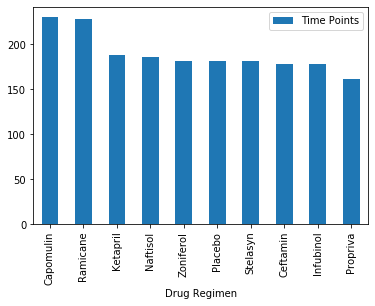

In [68]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
SdG= dG.sort_values("Time Points", ascending=0)
ax = SdG.plot.bar(y="Time Points")

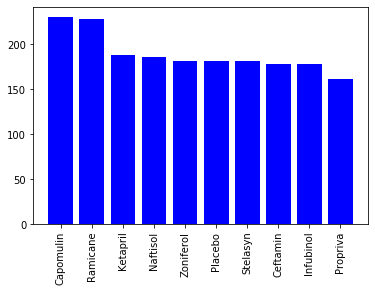

In [69]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
x_axis=(list(SdG.index) )
x_axis2=["1","2","3","4","5","6","7","8","9","10"]
time_points=SdG["Time Points"]
plt.bar(x_axis, time_points, color="b", align="center")
plt.xticks(rotation='vertical')
plt.show()

## Pie plots

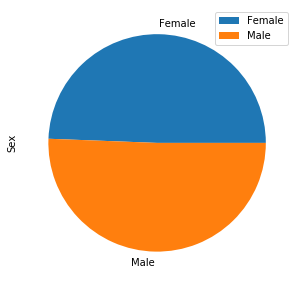

In [70]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
datasetGender=dataset
GenderGroup=round(datasetGender.groupby("Sex")["Sex"].count(),2)
GenderD = pd.DataFrame(GenderGroup)
plot = GenderD.plot.pie(y='Sex', figsize=(5, 5))

([<matplotlib.patches.Wedge at 0x1fe05cc3208>,
 [Text(0.02099250347258556, 1.0997996703027118, 'Female'),
  Text(-0.020992503472586185, -1.0997996703027118, 'Male')],
 [Text(0.011450456439592123, 0.5998907292560246, '49.4%'),
  Text(-0.011450456439592464, -0.5998907292560246, '50.6%')])

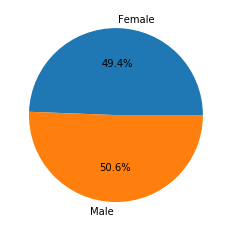

In [71]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels=(list(GenderD.index) )
sizes=GenderD["Sex"]
plt.pie(sizes,labels=labels, autopct='%1.1f%%')

## Quartiles, outliers and boxplots

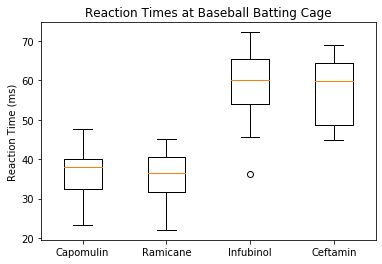

In [72]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
promising= dG.sort_values("SEM", ascending=1)
promising4=promising.iloc[:4]
datasetGroup=dataset
dGroup=datasetGroup.groupby(["Drug Regimen","Mouse ID"],as_index=False)["Tumor Volume (mm3)"].last()
Ramicane = dGroup[dGroup['Drug Regimen']=="Ramicane"]
Capomulin = dGroup[dGroup['Drug Regimen']=="Capomulin"]
Ceftamin = dGroup[dGroup['Drug Regimen']=="Ceftamin"]
Infubinol = dGroup[dGroup['Drug Regimen']=="Infubinol"]
VolumeR = list(Ramicane["Tumor Volume (mm3)"])
VolumeCa = list(Capomulin["Tumor Volume (mm3)"])
VolumeCe = list(Ceftamin["Tumor Volume (mm3)"])
VolumeI = list(Infubinol["Tumor Volume (mm3)"])
fig1, ax1 = plt.subplots()
ax1.set_title('Reaction Times at Baseball Batting Cage')
ax1.set_ylabel('Reaction Time (ms)')
ax1.boxplot([VolumeCa, VolumeR, VolumeI, VolumeCe], labels=("Capomulin","Ramicane","Infubinol","Ceftamin"))
plt.show()

## Line and scatter plots

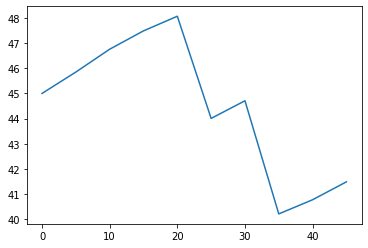

In [73]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
datasetGroup=dataset
L509 = datasetGroup[datasetGroup['Mouse ID']=="l509"]
L509
plt.plot(L509["Timepoint"], L509["Tumor Volume (mm3)"])


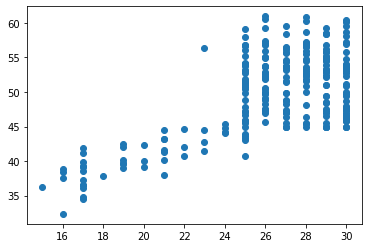

In [74]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
datasetScatterI=dataset
datasetScatter=datasetScatterI[datasetScatterI['Drug Regimen']=="Capomulin"]
dGroupS1=datasetGroup.groupby(["Drug Regimen","Mouse ID"],as_index=False)["Tumor Volume (mm3)"].mean()
dGroupS2=datasetGroup.groupby(["Drug Regimen","Mouse ID"],as_index=False)["Weight (g)"].mean()
dGroupS1["Weight (g)"]=dGroupS2["Weight (g)"]
dGroupS1
x=dGroupS1["Weight (g)"]
y=dGroupS1["Tumor Volume (mm3)"]
plt.scatter(x,y)

In [75]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen

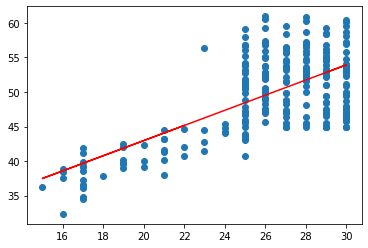

In [79]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")